#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [69]:
# !pip install MiniSom

## Importing the libraries


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [71]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [72]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [73]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


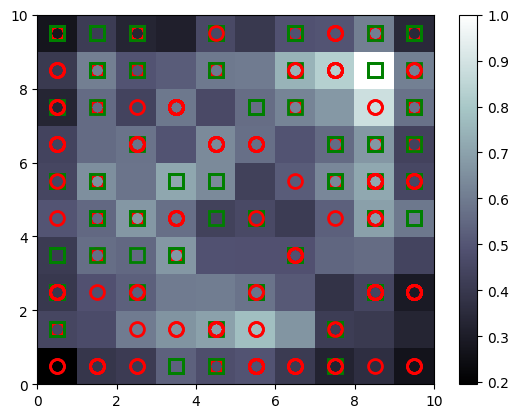

In [74]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [82]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,7)], mappings[(4,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [83]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15761854
15725776
15815040
15697460
15788442
15586183
15718921
15633944
15607988
15801072
15683993
15797767
15744044
15632010
15804235
15627365
15700300
15791944
15576680
15620570
15592412
15775750
15690372
15775235
15780088
15768474
15762045
15750476
15799859
15789014


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [84]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [85]:
# Zeroes are replaced by ones for all customers who have commited a fraud

is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [87]:
import tensorflow as tf
tf.__version__

'2.12.0'

## Initializing the ANN

In [88]:
ann = tf.keras.models.Sequential()

## Adding the input layer 

In [89]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [90]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [91]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [92]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.3508 - accuracy: 0.9565
Epoch 2/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1743 - accuracy: 0.9565
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1241 - accuracy: 0.9565
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1090 - accuracy: 0.9565
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0999 - accuracy: 0.9565
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0921 - accuracy: 0.9565
Epoch 7/10
690/690 [==============================] - 2s 2ms/step - loss: 0.0858 - accuracy: 0.9565
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9565
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9565
Epoch 10/10
690/690 [==============================] - 2s 3ms/step - loss: 0.0721 - accuracy: 0.9565

## Predicting test set results

In [93]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)#Concatinating customer_id we are usin axis=1 as we are concatinating a column
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 4ms/step


In [96]:
print(y_pred)

[[15767358.00 0.00]
 [15713160.00 0.00]
 [15641007.00 0.00]
 ...
 [15621423.00 0.38]
 [15664793.00 0.38]
 [15586183.00 0.38]]
